In [377]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns',None)

In [378]:
data = pd.read_csv("bank-full.csv", delimiter=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [379]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [380]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [381]:
data['education'].unique()


array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [382]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Random Forest model

In [383]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn import metrics

In [385]:
data['y'] = data['y'].map({'no':0, 'yes':1})
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [386]:
from sklearn.preprocessing import LabelEncoder
label_encoder2 = LabelEncoder()

cols = ['job', 'marital', 'education', 'default','housing','loan', 'contact','month','poutcome']


for column in cols:
    data[column] = label_encoder2.fit_transform(data[column])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


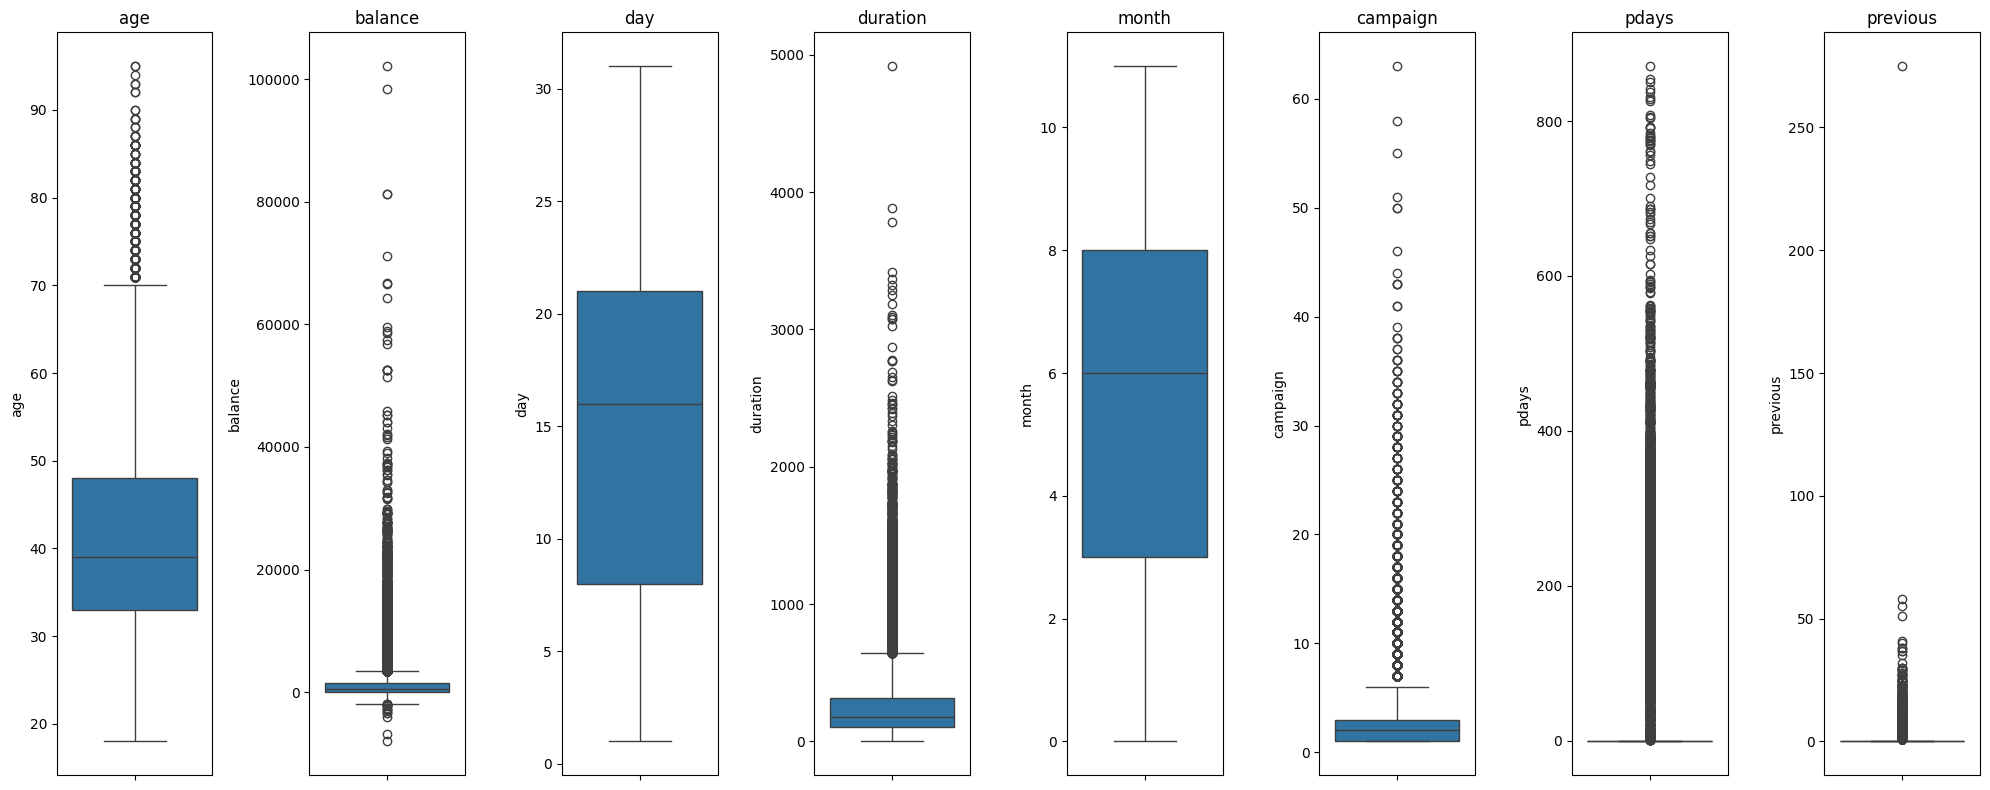

In [387]:
numeric_columns = ['age','balance','day','duration','month','campaign','pdays','previous']

plt.figure(figsize=(20,8))

for i in range(len(numeric_columns)):
    plt.subplot(1, len(numeric_columns), i + 1)
    sns.boxplot(data=data, y= numeric_columns[i])
    plt.title(numeric_columns[i])

plt.tight_layout()
plt.show()

In [388]:
outlier_columns = ['age','duration','campaign','balance']
for i in range(len(outlier_columns)):
    lower_bound = data[outlier_columns[i]].quantile(0.1)
    upper_bound = data[outlier_columns[i]].quantile(0.9)
    data[outlier_columns[i]] = data[outlier_columns[i]].clip(lower=lower_bound, upper=upper_bound)

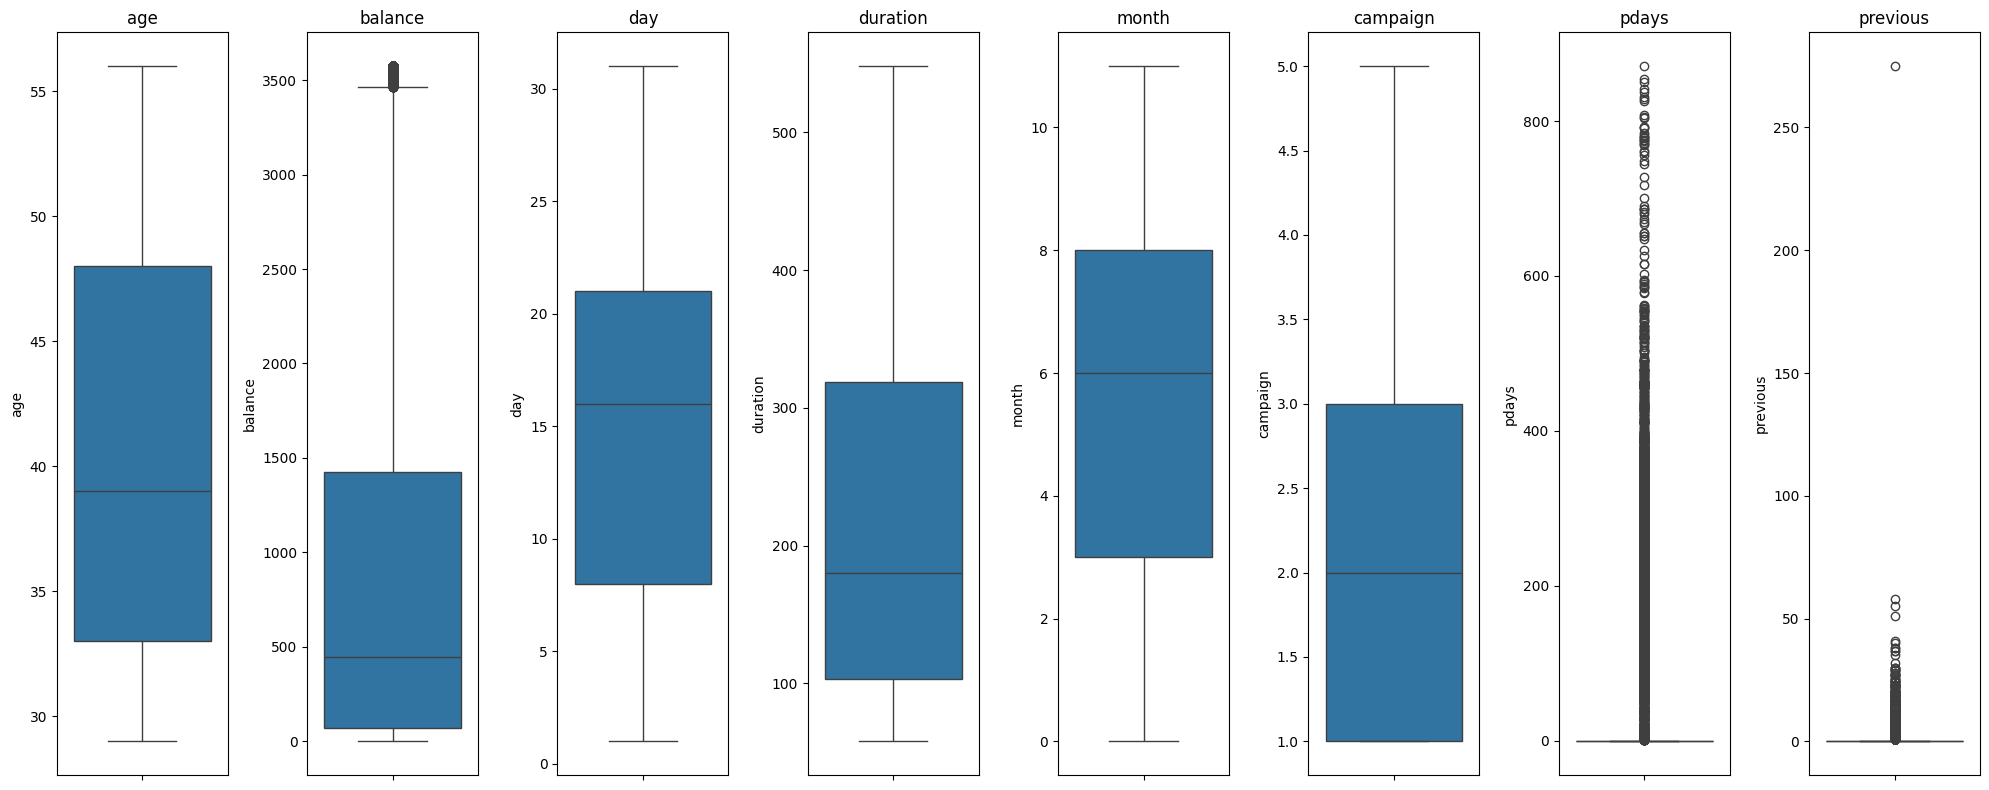

In [389]:
plt.figure(figsize=(20,8))

for i in range(len(numeric_columns)):
    plt.subplot(1, len(numeric_columns), i + 1)
    sns.boxplot(data=data, y= numeric_columns[i])
    plt.title(numeric_columns[i])

plt.tight_layout()
plt.show()

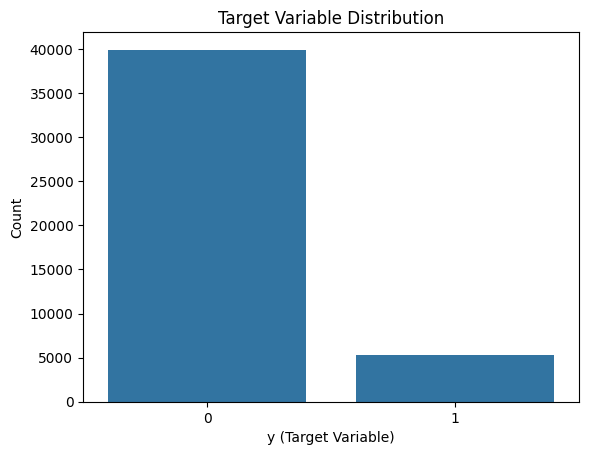

In [414]:
sns.countplot(data=data, x='y')
plt.title("Target Variable Distribution")
plt.xlabel("y (Target Variable)")
plt.ylabel("Count")
plt.show()

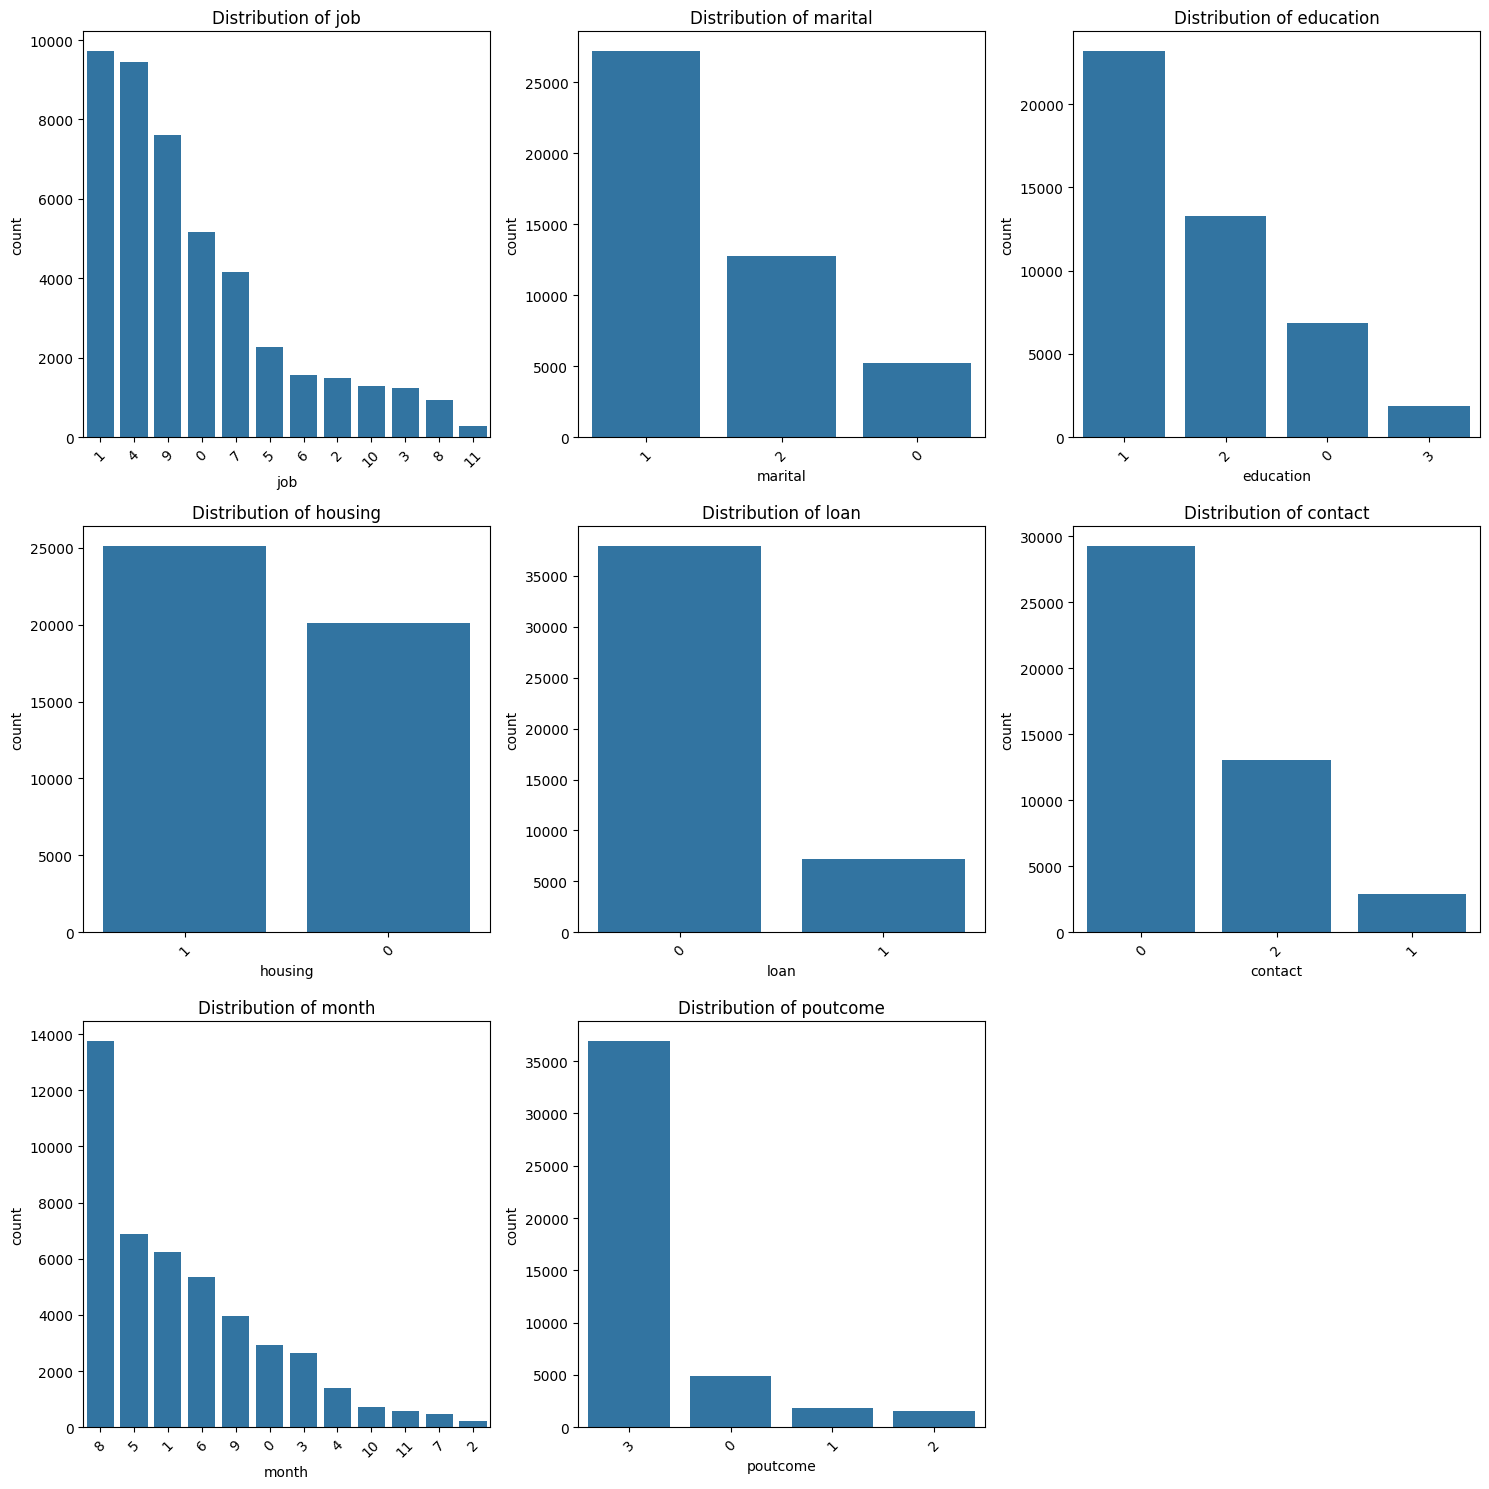

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']

columns = 3  
rows = 3

fig, axes = plt.subplots(rows, columns, figsize=(15, 15))
axes = axes.flatten() 


for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)  

for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

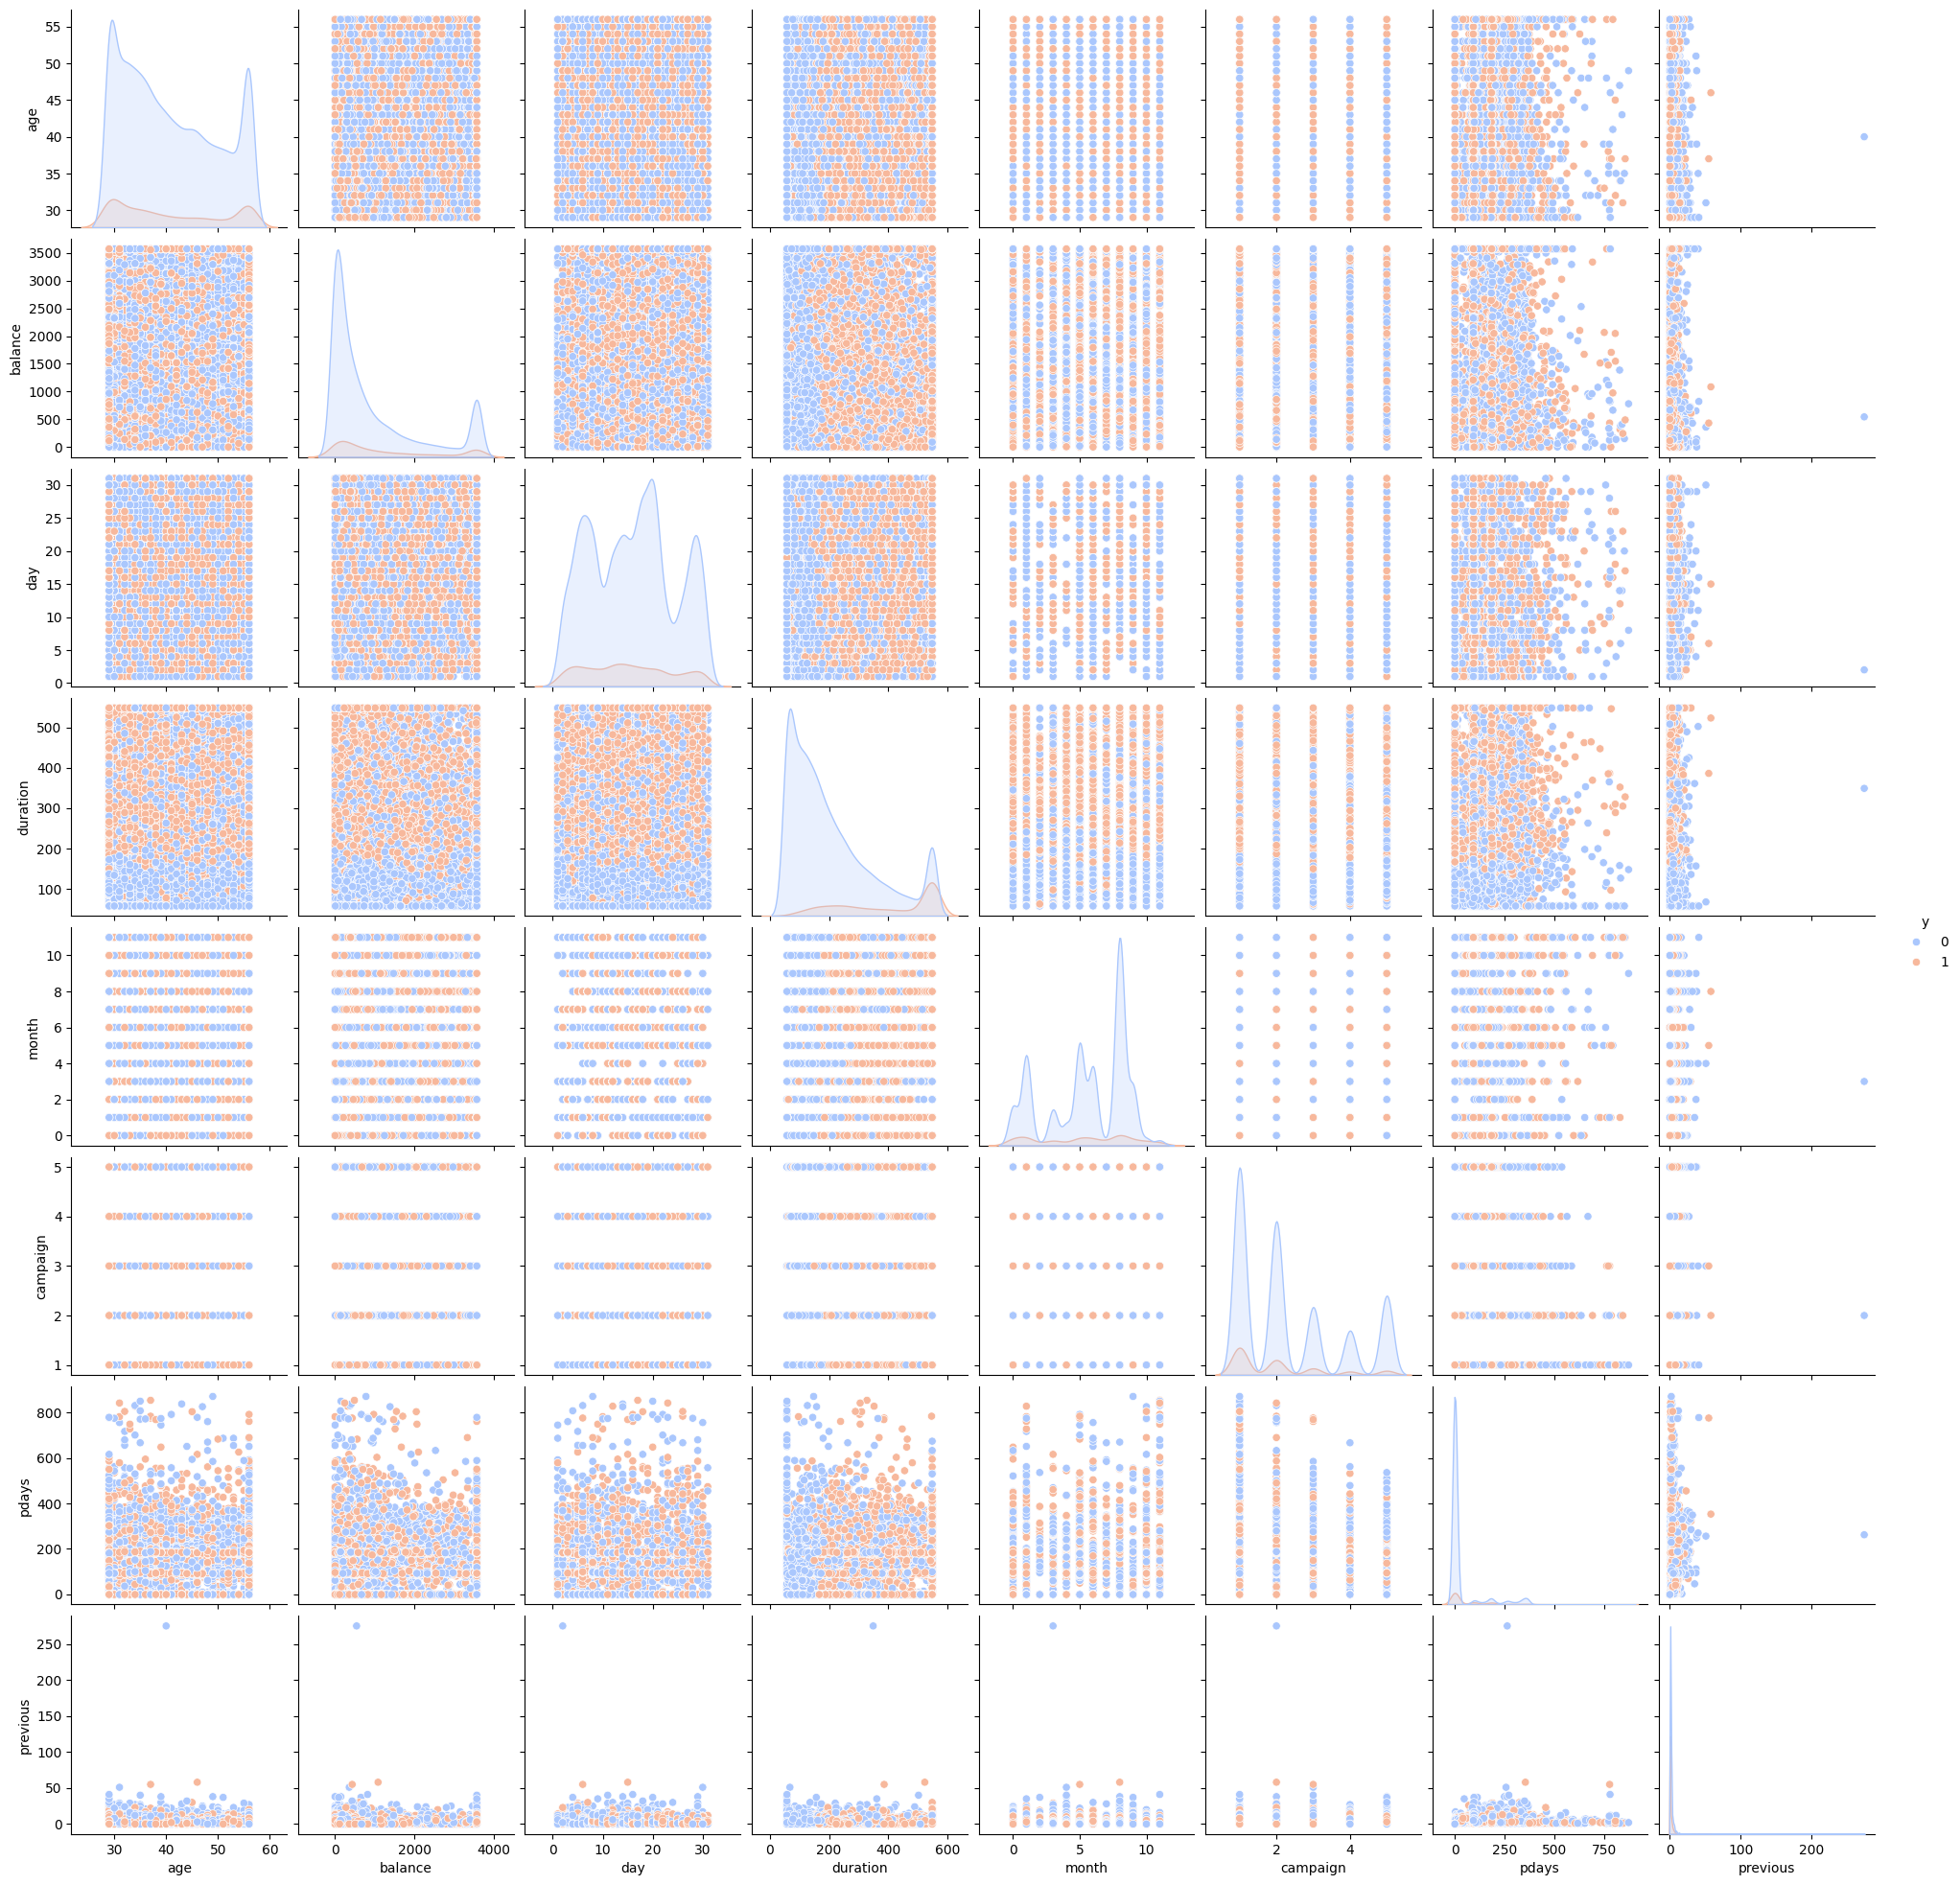

In [416]:
sns.pairplot(data, vars=numeric_columns, hue='y', palette='coolwarm')
plt.show()

In [390]:
X = data.drop(['y','pdays','previous'], axis=1)
Y = data['y']

X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X,Y, test_size=0.3)

In [391]:
print(data['y'].value_counts(normalize=True)*100)

y
0    88.30152
1    11.69848
Name: proportion, dtype: float64


In [392]:
smote = SMOTE(sampling_strategy='minority')
X_train_final_new,Y_train_final_new = smote.fit_resample(X_train_new,Y_train_new)

print(Y_train_final_new.value_counts(normalize=True)*100)

y
0    50.0
1    50.0
Name: proportion, dtype: float64


In [393]:
rf_model_new = RandomForestClassifier(n_estimators=300,max_depth=15)
rf_model_new.fit(X_train_final_new, Y_train_final_new)

RandomForestClassifier(max_depth=15, n_estimators=300)

In [394]:
Y_pred_new = rf_model_new.predict(X_test_new)

In [395]:
print(accuracy_score(Y_test_new,Y_pred_new))

0.8745945148923622


In [396]:
print(classification_report(Y_test_new,Y_pred_new))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93     11968
           1       0.48      0.67      0.56      1596

    accuracy                           0.87     13564
   macro avg       0.71      0.79      0.74     13564
weighted avg       0.90      0.87      0.88     13564



In [397]:
train_accuracy_new1 = rf_model_new.score(X_train_final_new, Y_train_final_new) 
print('Training Accuracy',train_accuracy_new1)

Training Accuracy 0.9634757100951563


In [398]:
correlations = data.corr()
correlations

plt.figure(figsize=(100,100))
sns.heatmap(correlations,annot=True)

<Axes: >

## PCA


In [399]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_final_new_pca = pca.fit_transform(X_train_final_new)
X_test_new_pca = pca.transform(X_test_new)

In [400]:
random_forrest_model_pca_new = RandomForestClassifier(n_estimators=300,random_state=1,class_weight='balanced')
random_forrest_model_pca_new.fit(X_train_final_new_pca, Y_train_final_new)

random_forrest_model_pred_pca_new = random_forrest_model_pca_new.predict(X_test_new_pca)
print("Accuracy:" , accuracy_score(Y_test_new,random_forrest_model_pred_pca_new))

Accuracy: 0.6442052491890298


In [401]:
print("Random Forest with pca")
print(classification_report(Y_test_new,random_forrest_model_pred_pca_new))
print(metrics.confusion_matrix(Y_test_new,random_forrest_model_pred_pca_new))

Random Forest with pca
              precision    recall  f1-score   support

           0       0.92      0.66      0.76     11968
           1       0.18      0.55      0.27      1596

    accuracy                           0.64     13564
   macro avg       0.55      0.60      0.52     13564
weighted avg       0.83      0.64      0.71     13564

[[7855 4113]
 [ 713  883]]


## Feature Importance Method

In [402]:
importances_new = rf_model_new.feature_importances_

threshold = 0.01
important_features_new = X_train_final_new.columns[importances_new > threshold]
x_train_final_ref_new = X_train_final_new[important_features_new]
x_test_final_ref_new = X_test_new[important_features_new]

x_train_final_ref_new

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,29,9,0,1,124,0,0,2,27,8,125,1,3
1,38,0,1,1,664,1,0,2,14,8,256,2,3
2,54,1,1,1,3002,0,0,0,13,1,110,4,3
3,37,0,2,1,20,1,0,0,11,8,207,1,0
4,44,9,1,1,3574,1,0,0,5,1,163,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55903,29,9,1,2,483,0,0,0,23,8,115,1,2
55904,35,7,2,1,0,1,0,0,13,8,548,3,3
55905,31,4,0,2,254,0,0,0,18,2,548,4,2
55906,36,8,1,1,3574,0,0,0,7,4,145,1,2


In [403]:
random_forrest_model_ref_new = RandomForestClassifier( n_estimators=800,random_state=1,max_depth=10)
random_forrest_model_ref_new.fit(X_train_final_new, Y_train_final_new)

random_forrest_model_ref_pred_new = random_forrest_model_ref_new.predict(X_test_new)
print("Testing Accuracy:", accuracy_score(Y_test_new, random_forrest_model_ref_pred_new))
print(classification_report(Y_test_new, random_forrest_model_ref_pred_new))

Testing Accuracy: 0.8561633736360955
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     11968
           1       0.43      0.72      0.54      1596

    accuracy                           0.86     13564
   macro avg       0.70      0.80      0.73     13564
weighted avg       0.90      0.86      0.87     13564



In [404]:
y_pred_proba_new = random_forrest_model_ref_new.predict_proba(X_test_new)[:, 1]

custom_threshold = 0.4
y_pred_custom_new = (y_pred_proba_new >= custom_threshold).astype(int)

print(classification_report(Y_test_new, y_pred_custom_new))
print("Testing Accuracy:", accuracy_score(Y_test_new, y_pred_custom_new))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89     11968
           1       0.39      0.83      0.53      1596

    accuracy                           0.83     13564
   macro avg       0.68      0.83      0.71     13564
weighted avg       0.90      0.83      0.85     13564

Testing Accuracy: 0.8274107932763197


## Hyperparameter Tuning

In [405]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [800, 1000],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', {0: 1, 1: 3}]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=3,
                           n_jobs=-1)
grid_search.fit(X_train_final_new, Y_train_final_new)

best_model = grid_search.best_estimator_


In [406]:
y_pred_new = best_model.predict(X_test_new)
print("Accuracy:", accuracy_score(Y_test_new, y_pred_new))
print(classification_report(Y_test_new, y_pred_new))

Accuracy: 0.8852845768209967
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     11968
           1       0.51      0.61      0.55      1596

    accuracy                           0.89     13564
   macro avg       0.73      0.76      0.74     13564
weighted avg       0.89      0.89      0.89     13564



In [407]:
train_accuracy_new = best_model.score(X_train_final_new, Y_train_final_new) 
print('Training Accuracy',train_accuracy_new)

Training Accuracy 1.0


## Neural Network

In [429]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.optimizers import Adam


In [409]:
scaler = StandardScaler()
X_train_scaled_new = scaler.fit_transform(X_train_final_new)
X_test_scaled_new = scaler.transform(X_test_new)

neural_network_model = Sequential()
neural_network_model.add(Dense(128, input_dim=X_train_scaled_new.shape[1], activation='relu'))
neural_network_model.add(Dropout(0.4))
neural_network_model.add(Dense(64, activation='relu'))
neural_network_model.add(Dropout(0.3))
neural_network_model.add(Dense(32, activation='relu'))
neural_network_model.add(Dense(16, activation='relu'))
neural_network_model.add(Dense(1, activation='sigmoid'))

neural_network_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = neural_network_model.fit(X_train_scaled_new, Y_train_final_new, epochs=100, batch_size=32, validation_split=0.2, verbose=1)



c:\Users\dulin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7990 - loss: 0.4135 - val_accuracy: 0.8928 - val_loss: 0.3070
Epoch 2/100
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8536 - loss: 0.3349 - val_accuracy: 0.9019 - val_loss: 0.2544
Epoch 3/100
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8594 - loss: 0.3153 - val_accuracy: 0.9233 - val_loss: 0.2304
Epoch 4/100
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8661 - loss: 0.3023 - val_accuracy: 0.9086 - val_loss: 0.2582
Epoch 5/100
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8693 - loss: 0.3047 - val_accuracy: 0.9012 - val_loss: 0.2818
Epoch 6/100
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8653 - loss: 0.2992 - val_accuracy: 0.9102 - val_loss: 0.2471
Epoch 7/100
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8715 - loss: 0.2964 - val_accuracy: 0.9168 - val_loss: 0.2204
Epoch 8/100
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8705 - loss: 0

In [410]:
loss_new, accuracy_new = neural_network_model.evaluate(X_test_scaled_new, Y_test_new)
print("Testing Accuracy:", accuracy_new)
print("Loss:", loss_new)

424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8724 - loss: 0.2731
Testing Accuracy: 0.8649365901947021
Loss: 0.2779839336872101


In [411]:
y_pred_neural_network_new = neural_network_model.predict(X_test_scaled_new)
y_pred_nn_new = (y_pred_neural_network_new > 0.5).astype(int)

424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [412]:
report =  classification_report(Y_test_new,y_pred_nn_new)
print("Neural Network")
print(report)

Neural Network
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     11968
           1       0.45      0.68      0.54      1596

    accuracy                           0.86     13564
   macro avg       0.70      0.78      0.73     13564
weighted avg       0.89      0.86      0.88     13564



In [413]:
training_loss_new, training_accuracy_new = neural_network_model.evaluate(X_train_scaled_new, Y_train_final_new)
print("Training Loss:", training_loss_new)
print("Training Accuracy:", training_accuracy_new)

1748/1748 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8899 - loss: 0.2439
Training Loss: 0.22457469999790192
Training Accuracy: 0.9122665524482727


## Neural Network with more Epochs

In [433]:
scaler = StandardScaler()
X_train_scaled_new = scaler.fit_transform(X_train_final_new)
X_test_scaled_new = scaler.transform(X_test_new)

neural_network_model_2 = Sequential()
neural_network_model_2.add(Dense(128, input_dim=X_train_scaled_new.shape[1], activation='relu'))
neural_network_model_2.add(Dropout(0.4))
neural_network_model_2.add(Dense(64, activation='relu'))
neural_network_model_2.add(Dropout(0.3))
neural_network_model_2.add(Dense(32, activation='relu'))
neural_network_model_2.add(Dense(16, activation='relu'))
neural_network_model_2.add(Dense(1, activation='sigmoid'))

neural_network_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = neural_network_model_2.fit(X_train_scaled_new, Y_train_final_new, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/200


c:\Users\dulin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1398/1398 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7951 - loss: 0.4193 - val_accuracy: 0.8787 - val_loss: 0.3029
Epoch 2/200
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8536 - loss: 0.3308 - val_accuracy: 0.8930 - val_loss: 0.2757
Epoch 3/200
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8637 - loss: 0.3123 - val_accuracy: 0.8977 - val_loss: 0.2642
Epoch 4/200
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8670 - loss: 0.3054 - val_accuracy: 0.9040 - val_loss: 0.2873
Epoch 5/200
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8643 - loss: 0.3053 - val_accuracy: 0.9074 - val_loss: 0.2746
Epoch 6/200
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8690 - loss: 0.3002 - val_accuracy: 0.9377 - val_loss: 0.2226
Epoch 7/200
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8732 - loss: 0.2942 - val_accuracy: 0.8846 - val_loss: 0.3042
Epoch 8/200
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8731 - loss: 0.2894 - val_

In [434]:
y_pred_neural_network_new_2 = neural_network_model_2.predict(X_test_scaled_new)
y_pred_nn_new_2 = (y_pred_neural_network_new_2 > 0.5).astype(int)

424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step


In [435]:
report =  classification_report(Y_test_new,y_pred_nn_new)
print("Neural Network")
print(report)
loss_new_2, accuracy_new_2 = neural_network_model_2.evaluate(X_test_scaled_new, Y_test_new)
print("Testing Accuracy:", accuracy_new_2)
print("Loss:", loss_new_2)

Neural Network
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     11968
           1       0.45      0.68      0.54      1596

    accuracy                           0.86     13564
   macro avg       0.70      0.78      0.73     13564
weighted avg       0.89      0.86      0.88     13564

424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8744 - loss: 0.2738
Testing Accuracy: 0.8712769150733948
Loss: 0.27408739924430847


In [440]:
X_train_scaled_pca = scaler.fit_transform(X_train_final_new_pca)
X_test_scaled_pca = scaler.transform(X_test_new_pca)

input_dim = X_train_scaled_pca.shape[1] 

neural_network_model_pca = Sequential()
neural_network_model_pca.add(Dense(128, input_dim=input_dim, activation='relu'))
neural_network_model_pca.add(Dropout(0.4))
neural_network_model_pca.add(Dense(64, activation='relu'))
neural_network_model_pca.add(Dropout(0.3))
neural_network_model_pca.add(Dense(32, activation='relu'))
neural_network_model_pca.add(Dense(16, activation='relu'))
neural_network_model_pca.add(Dense(1, activation='sigmoid'))

neural_network_model_pca.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = neural_network_model_pca.fit(X_train_scaled_pca, Y_train_final_new, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100


c:\Users\dulin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1398/1398 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6170 - loss: 0.6594 - val_accuracy: 0.0000e+00 - val_loss: 0.9852
Epoch 2/100
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6282 - loss: 0.6497 - val_accuracy: 0.0000e+00 - val_loss: 0.9630
Epoch 3/100
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6238 - loss: 0.6531 - val_accuracy: 0.0000e+00 - val_loss: 0.9469
Epoch 4/100
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6257 - loss: 0.6511 - val_accuracy: 0.0000e+00 - val_loss: 0.9529
Epoch 5/100
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6237 - loss: 0.6528 - val_accuracy: 0.0000e+00 - val_loss: 0.9929
Epoch 6/100
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6248 - loss: 0.6508 - val_accuracy: 0.0000e+00 - val_loss: 1.0148
Epoch 7/100
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6193 - loss: 0.6523 - val_accuracy: 0.0000e+00 - val_loss: 0.9855
Epoch 8/100
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 

In [442]:
y_pred_neural_network_new_pca = neural_network_model_pca.predict(X_test_scaled_pca)
y_pred_nn_new_pca = (y_pred_neural_network_new_pca > 0.5).astype(int)


424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [445]:

loss_new_pca, accuracy_new_pca = neural_network_model_pca.evaluate(X_test_scaled_pca, Y_test_new)
print("Testing Accuracy:", accuracy_new_pca)
print("Loss:", loss_new_pca)

424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8833 - loss: 0.5189
Testing Accuracy: 0.8823356032371521
Loss: 0.5183608531951904
